In [1]:
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_path = "state-farm-distracted-driver-dataset/imgs/train"
test_path = "state-farm-distracted-driver-dataset/imgs/test"

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 16,814,666
Non-trainable params: 0
_________________________________________________________________


In [9]:
conv_base.trainable = False

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 16,814,666
Trainable params: 2,099,978
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 32

train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range = 0.2,
      width_shift_range=0.1,
      height_shift_range=0.1,
      brightness_range=(0.6,1.2),
      zoom_range=0.1,
#       horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.40)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=True,
    seed=42
)

Found 13460 images belonging to 10 classes.
Found 8964 images belonging to 10 classes.


(32, 150, 150, 3)


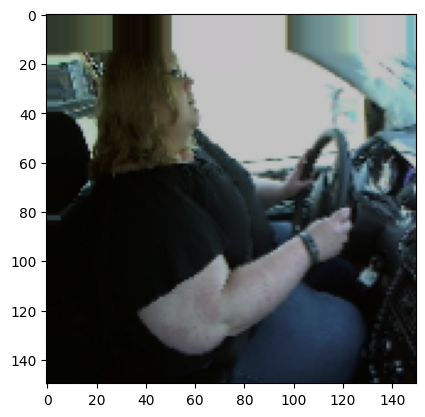

(32, 150, 150, 3)


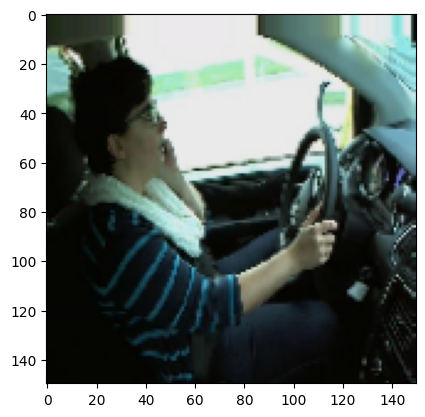

(32, 150, 150, 3)


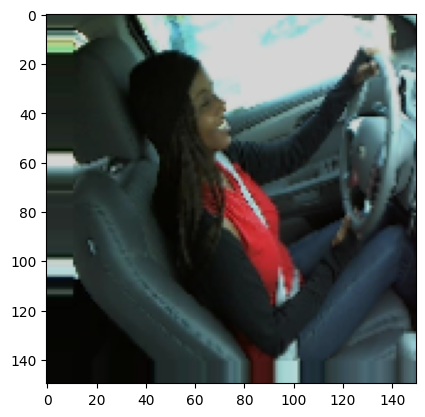

(32, 150, 150, 3)


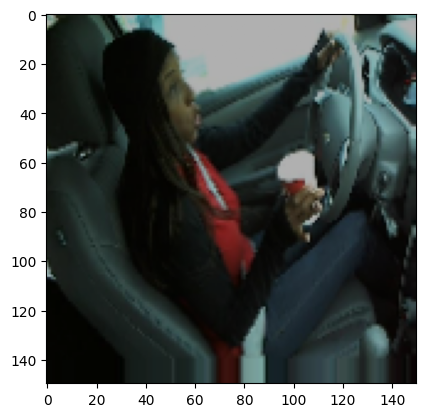

(32, 150, 150, 3)


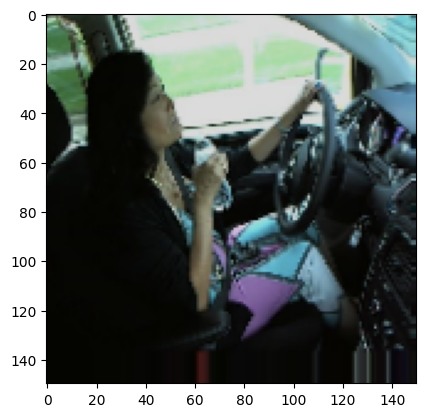

In [13]:
for _ in range(5):
    img, label = train_generator.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_generator,epochs=10,validation_data=valid_generator)

Epoch 1/10
421/421 [==============================] - 253s 580ms/step - loss: 0.7480 - accuracy: 0.7770 - val_loss: 0.3325 - val_accuracy: 0.8996
Epoch 2/10
421/421 [==============================] - 189s 449ms/step - loss: 0.2393 - accuracy: 0.9296 - val_loss: 0.1867 - val_accuracy: 0.9482
Epoch 3/10
421/421 [==============================] - 189s 449ms/step - loss: 0.1696 - accuracy: 0.9475 - val_loss: 0.1728 - val_accuracy: 0.9483
Epoch 4/10
421/421 [==============================] - 191s 453ms/step - loss: 0.1406 - accuracy: 0.9572 - val_loss: 0.1996 - val_accuracy: 0.9401
Epoch 5/10
421/421 [==============================] - 192s 455ms/step - loss: 0.1294 - accuracy: 0.9591 - val_loss: 0.1461 - val_accuracy: 0.9557
Epoch 6/10
421/421 [==============================] - 213s 507ms/step - loss: 0.1131 - accuracy: 0.9636 - val_loss: 0.1224 - val_accuracy: 0.9606
Epoch 7/10
421/421 [==============================] - 219s 520ms/step - loss: 0.0951 - accuracy: 0.9698 - val_loss: 0.1229 -

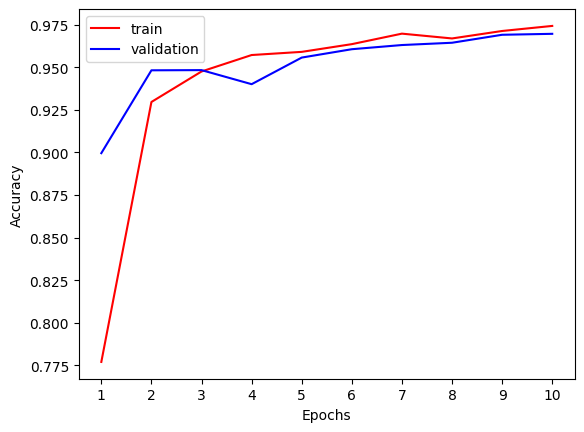

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xticks(np.arange(0,10),np.arange(1,11))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

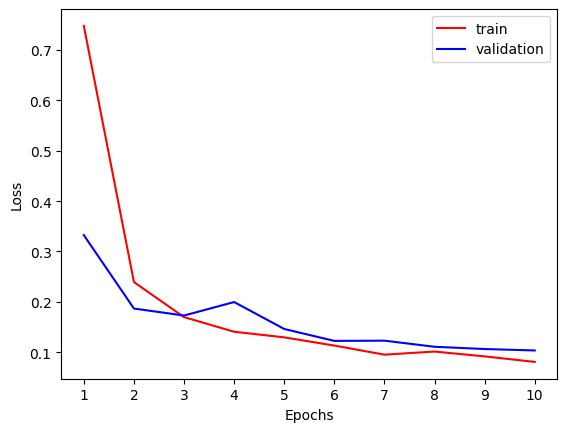

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xticks(np.arange(0,10),np.arange(1,11))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
valid_pred = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(150, 150),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset='validation',
    shuffle=False,
    seed=42
)

Found 8964 images belonging to 10 classes.


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
y_true = valid_pred.classes

y_prob = model.predict(valid_pred) 
y_pred = y_prob.argmax(axis=-1)

In [21]:
label_map = (valid_pred.class_indices)

label_map

{'c0': 0,
 'c1': 1,
 'c2': 2,
 'c3': 3,
 'c4': 4,
 'c5': 5,
 'c6': 6,
 'c7': 7,
 'c8': 8,
 'c9': 9}

In [22]:
labels = ["Safe Driving", "Texting - Right", "Talking on Phone - Right", "Texting - Left", "Talking on Phone - Left", 
          "Operating Radio", "Drinking", "Reaching Behind", "Hair/Makeup", "Talking to Passenger"]

In [23]:
c_m = confusion_matrix(y_true, y_pred)

c_m

array([[974,   3,   1,   1,   7,   2,   1,   0,   2,   4],
       [  3, 902,   0,   0,   0,   0,   1,   0,   0,   0],
       [  3,   3, 915,   0,   2,   0,   3,   0,   0,   0],
       [ 39,   7,   0, 873,  17,   0,   0,   0,   0,   2],
       [  8,   0,   1,   3, 913,   0,   1,   0,   1,   3],
       [ 10,   0,   1,   0,   0, 912,   0,   0,   1,   0],
       [  3,   2,   5,   0,   1,   0, 916,   1,   1,   1],
       [  1,   7,   5,   0,   1,   1,   4, 771,   4,   6],
       [ 14,   9,  16,   0,   8,   2,  11,   3, 684,  17],
       [ 24,   3,   0,   2,   0,   0,   1,   0,   3, 818]], dtype=int64)

In [24]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       995
           1       0.96      1.00      0.98       906
           2       0.97      0.99      0.98       926
           3       0.99      0.93      0.96       938
           4       0.96      0.98      0.97       930
           5       0.99      0.99      0.99       924
           6       0.98      0.98      0.98       930
           7       0.99      0.96      0.98       800
           8       0.98      0.90      0.94       764
           9       0.96      0.96      0.96       851

    accuracy                           0.97      8964
   macro avg       0.97      0.97      0.97      8964
weighted avg       0.97      0.97      0.97      8964



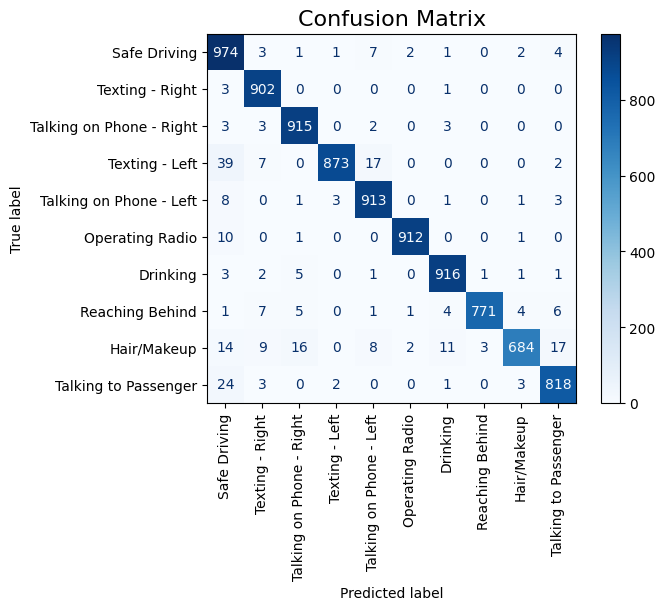

In [25]:
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)

# Setting colour map to be used
display_c_m.plot(cmap='Blues', xticks_rotation=90)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Confusion Matrix', fontsize=16)

# Saving plot
plt.savefig('vgg_conf.png', dpi=500, bbox_inches = 'tight')

plt.show()